<a href="https://colab.research.google.com/github/iresh-rajitha/image_to_character_segmentation/blob/main/image_to_character_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install deps

In [1]:
# prompt: I want to segment image to pages, block, paragraph, lines and characters when I upload a image like tesseract ocr. you can make a file upload to get file and I need to output as segmenting as my input likewise page, block, paragraph. No need to identify characters bcoz I'm going to build the OCR part

# Install necessary libraries
!pip install pytesseract
!apt-get install tesseract-ocr

# Import necessary libraries
import cv2
from google.colab import files
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,884 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

# Load Test Image

In [14]:
# Upload the image file
uploaded = files.upload()

Saving Screenshot from 2024-08-25 20-14-05.png to Screenshot from 2024-08-25 20-14-05.png


# Image to data

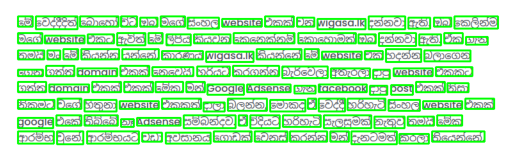

In [15]:
def segment_image(image_path):
  """
  Segments an image into pages, blocks, paragraphs, lines and characters.

  Args:
    image_path: Path to the image file.

  Returns:
    A dictionary containing the segmented image data and the original image.
  """
  # Load the image
  image = cv2.imread(image_path)

  # Convert the image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OCR using pytesseract
  data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT) # store the tesseract output

  # Extract page, block, paragraph, and line information
  pages = []
  blocks = []
  paragraphs = []
  lines = []
  characters = []

  for i in range(len(data['level'])):
    if data['level'][i] == 1:
      pages.append(i)
    elif data['level'][i] == 2:
      blocks.append(i)
    elif data['level'][i] == 3:
      paragraphs.append(i)
    elif data['level'][i] == 4:
      lines.append(i)
    elif data['level'][i] == 5:
      characters.append(i)

  # Create a dictionary to store the segmented data
  segmented_data = {
      'pages': pages,
      'blocks': blocks,
      'paragraphs': paragraphs,
      'lines': lines,
      'characters': characters,
      'image': image, # Include the original image for later use
      'data': data # Include the tesseract output data
  }

  return segmented_data

# Get the image file name
image_file_name = list(uploaded.keys())[0]

# Segment the image
segmented_data = segment_image(image_file_name)

for line_index in segmented_data['characters']:
  x, y, w, h = segmented_data['data']['left'][line_index], segmented_data['data']['top'][line_index], segmented_data['data']['width'][line_index], segmented_data['data']['height'][line_index]
  # Draw a green rectangle on the original image
  cv2.rectangle(segmented_data['image'], (x, y), (x + w, y + h), (0, 255, 0), 2) # (0, 255, 0) is for green color, 2 is line thickness

# Display the image with green rectangles
plt.imshow(cv2.cvtColor(segmented_data['image'], cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for plt.imshow
plt.axis('off')
plt.show()

In [4]:
!sudo apt-get install tesseract-ocr-sin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-sin
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,085 kB of archives.
After this operation, 1,742 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-sin all 1:4.00~git30-7274cfa-1.1 [1,085 kB]
Fetched 1,085 kB in 2s (622 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-sin.
(Reading 

In [19]:
def segment_image_string(image_path):
  """
  Extract text from an image and return it as a string.

  Args:
    image_path: Path to the image file.

  Returns:
    The extracted text as a string.
  """
  # Load the image
  image = Image.open(image_path)

  # Perform OCR using pytesseract.image_to_string
  # re write below code line for sinhala and english
  text = pytesseract.image_to_string(image, lang='eng+sin')

  return text

In [20]:
image_file_name = list(uploaded.keys())[0]

# Segment the image
segmented_data = segment_image_string(image_file_name)

In [21]:
print(segmented_data)

මේ වෙද්දීදිත්‌ බොහෝ විට ඔබ මගේ සිංහල (//905106 එකක්‌ වන (/190503.1. දන්නවා ඇති. ඔබ කෙලින්ම
මගේ //9051:9 එකට ඇවිත්‌ මේ ලිපිය කියවන කෙනෙක්නම්‌ කොහොමත්‌ ඔබ දන්නවා ඇති. ඒක ගැන
තමයි මං මේ කියන්න යන්නේ. කාරණය ॥/190503.1!( කියන්නේ මේ (/9095166 එක හදන්න බලාගෙන
ගෙන ගත්ත 39(01310) එකක්‌ නෙවෙයි. හරියට කරගන්න බැරිවෙලා අතැරලා දාපු //60516 එකකට
@8@ domain oad Ome cSeo. Os} Google Adsense Oo facebook 4 post dees Hen
නිකමට වගේ හිතුනා (/6051:6 එකකත්‌ දාලා බලන්න, මොකද ඒ වෙද්දී හරිහැටි සිංහල 0//9051:6 එකක්‌
9099919 එකේ තිබ්බේ නෑ /,456/)56 සම්බන්දව. ඒ විදියට හරිහැටි සැලසුමක්‌ නැතුව තමයි මේක
ආරම්භ වුනේ. ආරම්භයට වඩා අවසානය ගොඩක්‌ වෙනස්‌ කරන්න මන්‌ දැනටමත්‌ කරලා තියෙන්නේ.



In [12]:
# print unicode of segment_data
print(segmented_data.encode('unicode_escape'))

b'\\u0db8\\u0dd4'
